In [7]:
import pandas as pd

In [23]:
# Load run info into Dataframes

dfs = {}
runners = ['Ape', "Tank", "Nation"]
for runner in runners:
    dfs[runner] = pd.read_csv(f"./csv/16 Star - {runner}.csv", parse_dates=['started', 'ended'])


In [24]:
# Get run completion percentage

for runner in runners:
    df = dfs[runner]
    
    totalRuns = df.shape[0]
    completed = df[df['realTime'].notna()].shape[0]
    
    print("Runner:", runner)
    print("Completed Runs:", completed, "/", totalRuns, f"({round(completed / totalRuns, 4) * 100}%)", "\n")


Runner: Ape
Completed Runs: 43 / 171 (25.15%) 

Runner: Tank
Completed Runs: 21 / 198 (10.61%) 

Runner: Nation
Completed Runs: 23 / 497 (4.63%) 



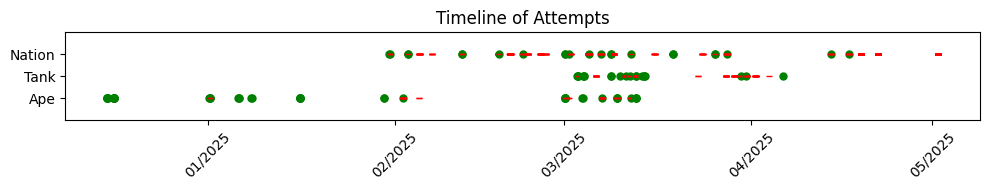

In [54]:
# Plot timeline of run attempts

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Setup the plot
fig, ax = plt.subplots(figsize=(10, 2))


for i in range(len(runners)):
    # Plot all events as line segments at y=0
    df = dfs[runners[i]]
    for _, row in df.iterrows():
        #ax.hlines(y=i, xmin=row['started'], xmax=row['ended'], color='steelblue', linewidth=4)
        completed = pd.notna(row['realTime'])
        ax.plot(row['started'], i, 'go' if completed else 'r_', markersize= 5)  # start
        #ax.plot(row['ended'], i, 'ro', markersize=5)    # end

# Formatting
ax.set_yticks(range(len(runners)))  # Hide y-axis ticks
ax.set_yticklabels(runners)
ax.set_ylim(-1, 3) # Optional, for spacing
#ax.set_xlabel('Date')
ax.set_title('Timeline of Attempts')
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Tick at start of each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))  # Format: 10/2024
plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.show()